In [ ]:
from keras.datasets import mnist
from keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

9


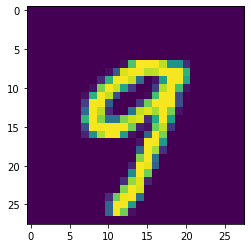

In [ ]:
print(train_labels[45])
plt.imshow(train_data[45])
plt.show()

In [ ]:
## Creando un modelo de datos
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Limpieza de datos
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0286 - accuracy: 0.9913
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9955
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0128 - accuracy: 0.9965
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0096 - accuracy: 0.9973
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0080 - accuracy: 0.9979
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0060 - accuracy: 0.9985
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 9/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0027 - accuracy: 0.9992

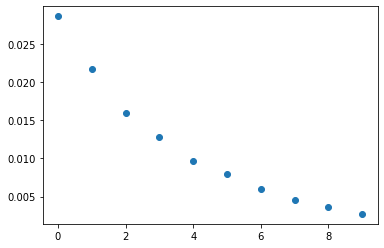

In [ ]:
## Entrenando el modelo
epochs_size = 10
history = model.fit(x_train, y_train, epochs=epochs_size, batch_size=128)

history_ = history.history
loss_history = history_['loss']
accuracy_history = history_['accuracy']

plt.scatter(range(epochs_size), loss_history)

In [ ]:
## Evaluando sobre data de test
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9838


[0.07778920233249664, 0.9837999939918518]

In [ ]:
predict = model.predict(x_test[0].reshape(1, -1))[0]
predict = np.where(predict == np.amax(predict))[0][0]

real = np.where(y_test[0] == np.amax(y_test[0]))[0][0]

predict == real

True

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>